In [1]:
import ML

In [2]:
data = ML.pd.read_csv("Donnees_sans_na.csv", sep=",")

# Recodage

In [3]:
X,y = ML.recodage(data)

# Split

In [4]:
X_train, X_test, y_train, y_test = ML.split(X,y,0.9)

# Normalisation 

In [5]:
X_train_ess, X_train_emm, X_test_ess, X_test_emm = ML.normalisation(X_train, X_test)

# Recherche du meilleur modèle

## Random Forest  - Choix des paramètres et meilleure normalisation

In [8]:
rfc = ML.GridSearchCV(estimator=ML.RFC(),param_grid=dict(n_estimators=list(range(10,110,10))),cv=5)

In [ ]:
rfc1 = rfc.fit(X_train,y_train)
print(rfc1.best_score_)

In [9]:
rfc_ss = rfc.fit(X_train_ess,y_train)
print(rfc_ss.best_score_)

C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed whe

C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.8489347966429954


In [ ]:
rfc_mm= rfc.fit(X_train_emm,y_train)
print(rfc_mm.best_score_)

## SVC - Choix des paramètres et meilleure normalisation

In [ ]:
svc = ML.GridSearchCV(estimtor=ML.SVC(),
                     param_grid=dict(C=[0.01,0.1,1,10,20])
                     )

In [ ]:
svc1 = svc.fit(X_train,y_train)
print(svc1.best_score_)

In [ ]:
svc_ss = svc.fit(X_train_ess,y_train)
print(svc_ss.best_score_)

In [ ]:
svc_mm= svc.fit(X_train_emm,y_train)
print(svc_mm.best_score_)

## KNN - Choix des paramètres et meilleure normalisation

In [ ]:
knn = ML.GridSearchCV(estimator=ML.KNN(),
                     param_grid=dict(n_neighbors=list(range(1, 31)))
                     )

In [ ]:
knn1 = knn.fit(X_train,y_train)
print(knn1.best_score_)

In [ ]:
knn_ss = knn.fit(X_train_ess,y_train)
print(knn_ss.best_score_)

In [ ]:
knn_mm = knn.fit(X_train_emm,y_train)
print(knn_mm.best_score_)

## Gaussian Process - Choix des paramètres et meilleure normalisation

In [ ]:
kernel = 1.0 * RBF(1.0)
gpc = GPC(kernel=kernel,random_state=0).fit(X_train, y_train)
gpc.score(X_train, y_train)

In [ ]:
kernel_rq = (1.0) * RationalQuadratic(alpha=0.1, length_scale=1)
gpc_rq = GPC(kernel=kernel_rq,random_state=0).fit(X_train, y_train)
gpc_rq.score(X_train, y_train)

### Standard Scaler

In [ ]:
kernel = 1.0 * RBF(1.0)
gpc_ss = GPC(kernel=kernel,random_state=0).fit(X_train_ess, y_train)
gpc_ss.score(X_train_ess, y_train)

In [ ]:
kernel_rq = (1.0) * RationalQuadratic(alpha=0.1, length_scale=1)
gpc_ss_rq = GPC(kernel=kernel_rq,random_state=0).fit(X_train_ess, y_train)
gpc_ss_rq.score(X_train_ess, y_train)

### MinMax Scaler

In [ ]:
kernel = 1.0 * RBF(1.0)
gpc_mm = GPC(kernel=kernel,random_state=0).fit(X_train_emm, y_train)
gpc_mm.score(X_train_emm, y_train)

In [ ]:
kernel_rq = (1.0) * RationalQuadratic(alpha=0.1, length_scale=1)
gpc_mm_rq = GPC(kernel=kernel_rq,random_state=0).fit(X_train_emm, y_train)
gpc_mm_rq.score(X_train_emm, y_train)

# Meilleur estimateur

In [12]:
predicteur = rfc_ss
print(predicteur)
predicteur.score(X_test_ess, y_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

0.8561437486550463

In [13]:
table_predite = predicteur.predict(X_test_ess)
table_predite

array([7, 2, 0, ..., 5, 7, 2])

# Comparaison prédiction - réalité

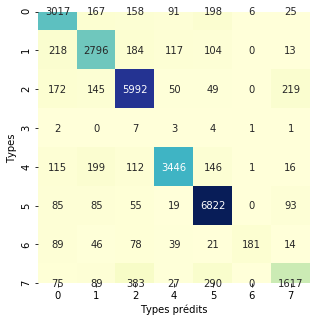

In [14]:
comp = ML.rpz_resultat(predicteur,X_test_ess, y_test)

In [16]:
ML.pd.crosstab(table_predite,y, rownames=['Types'], colnames=['Types prédits'])

Exception: Data must be 1-dimensional